<a href="https://colab.research.google.com/github/simodepth/topic-modeling/blob/main/Topic_Modeling_to_Inform_Content_Strategy_against_HCU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using Topic Modeling to Uncover Content Relevance across a website to tackle HCU

Topic modeling is an analysis that establishes content’s relevance across a selection of semantically related keywords.

**Why does it matter?**

Google uses *Topic Layering* to rank content. If your content does not meet the statistical expectations for a given topic, your content won’t be considered relevant.

With this Python script we’re going to perform an analysis to understand the most common entities leveraged on a website to:
- 🏘 create topic clusters
- 👵🏻 update old content
- 🕳 find content gaps
- ❌ find irrelevant topics to remove from Google Index

There are several existing algorithms you can use to perform the topic modeling.

Latent Dirichlet Allocation (**LDA**) is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

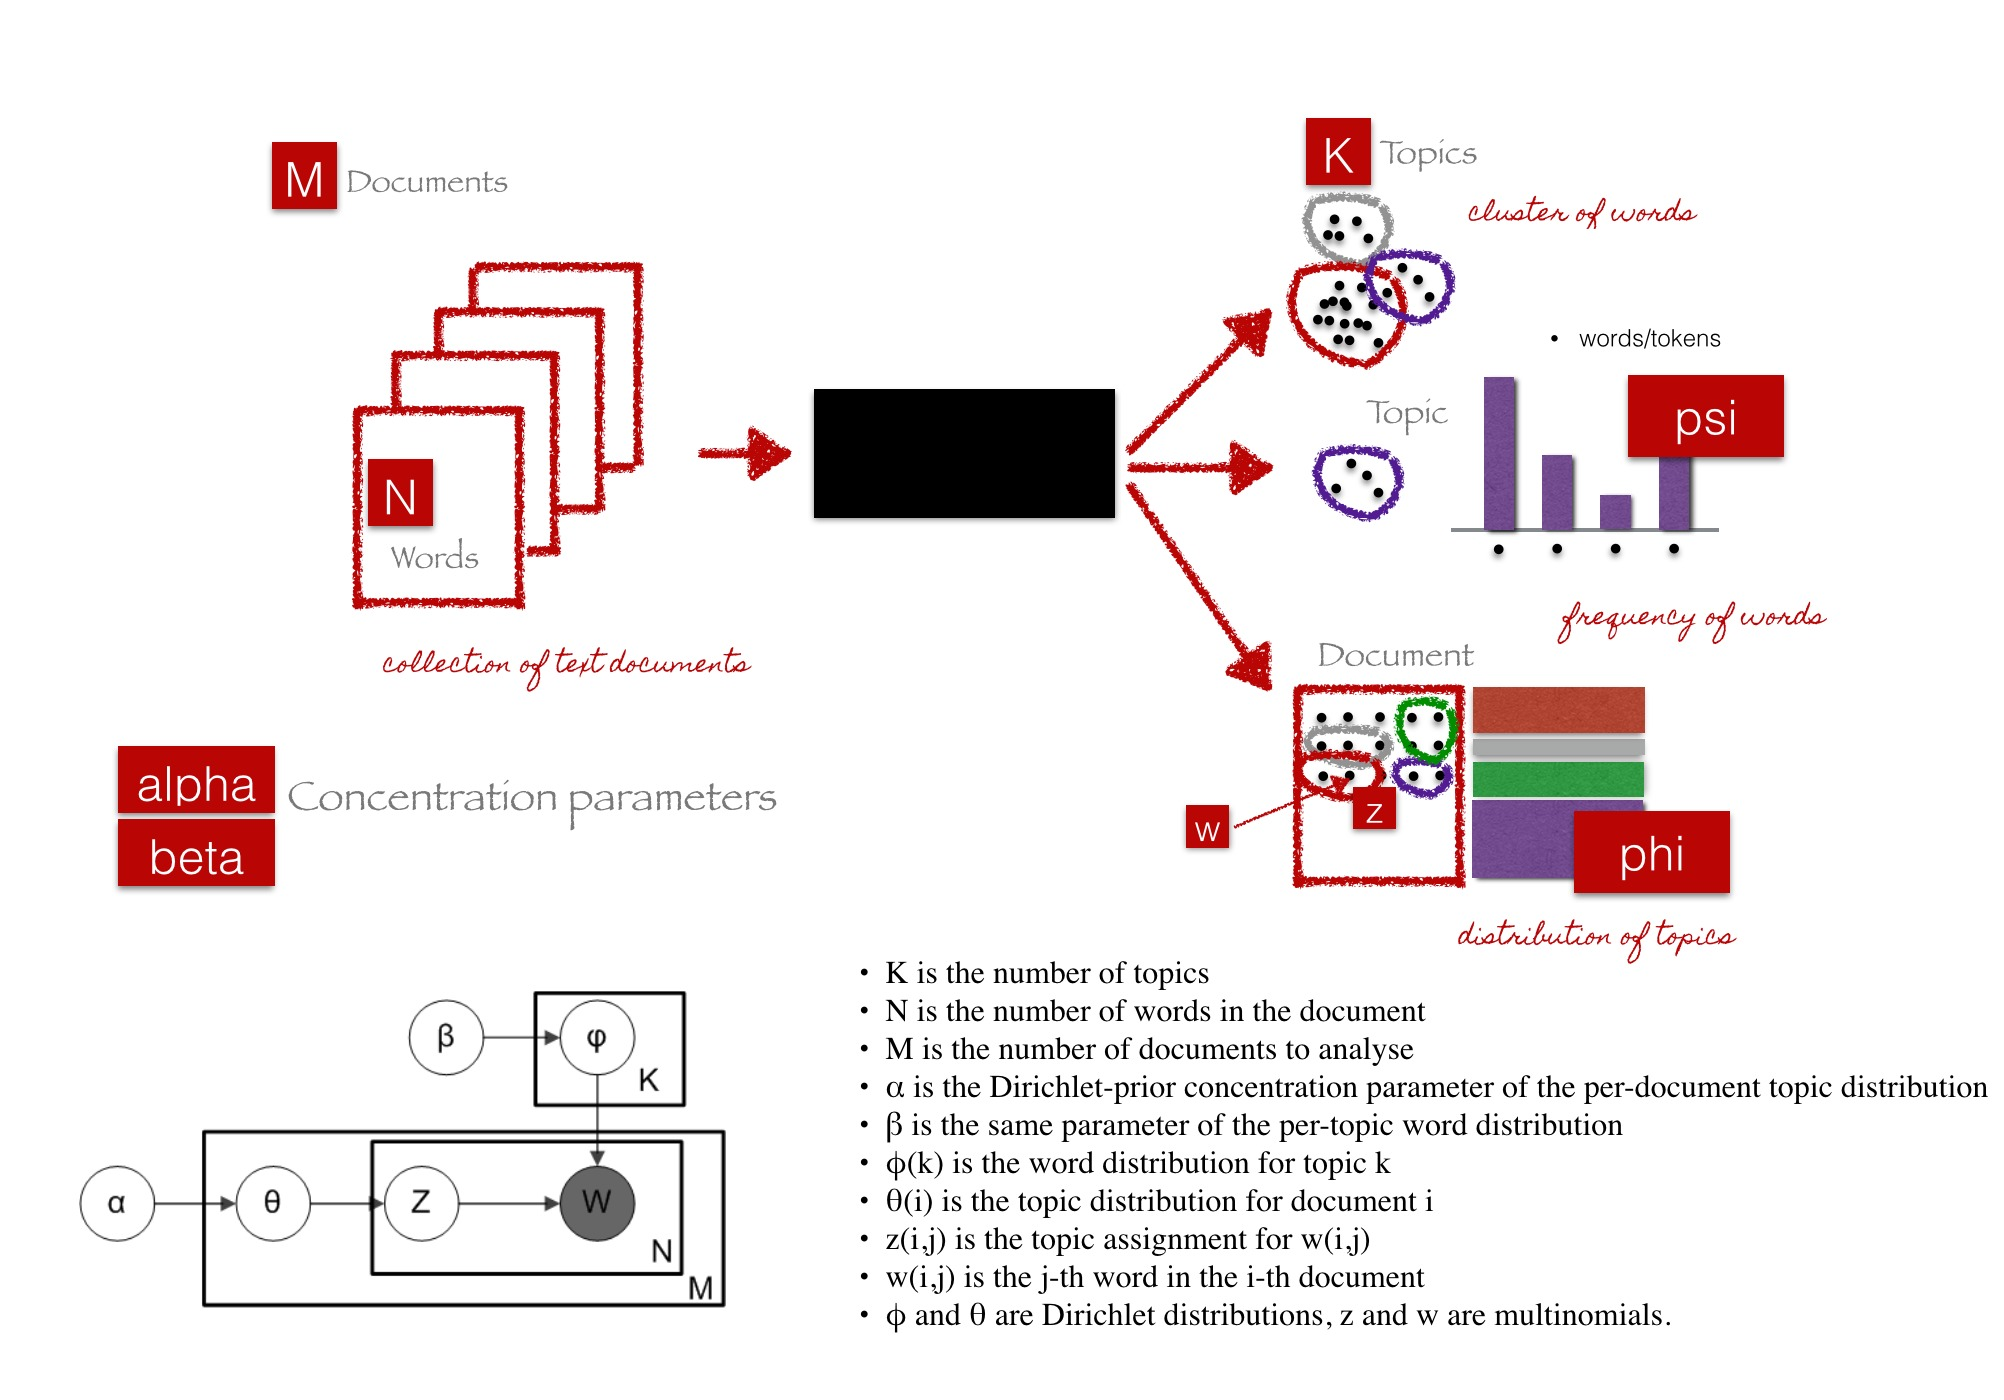

#Step 1: Loading Data


---
First we need to import **pandas** and **os** as the threshold libraries we'll be using.

Then we create a `crawl` function with Pandas to read a crawl file.

You can get it from the
[☕️(Basic) Web Crawler with Advertools☕️](https://colab.research.google.com/drive/1HEaufrS45ZIz-UapfyxOP1UELwelvREI)

In [1]:
# Importing modules
import pandas as pd
import os

os.chdir('..')

# Read data into papers
crawl = pd.read_csv('/content/iCloud Drive_Scrivania_crawl (1).csv')

# Print head
crawl.head()

,url,title,meta_desc,viewport,charset,h1,h2,canonical,alt_href,og:locale,...,request_headers_accept-encoding,request_headers_referer,h3,footer_links_url,footer_links_text,footer_links_nofollow,resp_headers_last-modified,resp_headers_x-nananana,h4,resp_headers_x-pingback
0,https://seodepths.com/,SEO Research and Python for SEO - SEO Depths,SEO Depths is a personal blog founded by Simon...,width=device-width,UTF-8,SEO Depths,SEO DEPTHS@@Google Pros and Cons are not Rich ...,https://seodepths.com/,https://seodepths.com/feed/@@https://seodepths...,en_GB,...,"gzip, deflate",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://seodepths.com/about-2/,About: Simone De Palma - SEO Depths,SEO Depths is an SEO blog aspiring to test Pyt...,width=device-width,UTF-8,NaN,Simone De Palma@@Highlights,https://seodepths.com/about-2/,https://seodepths.com/feed/@@https://seodepths...,en_GB,...,"gzip, deflate",https://seodepths.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://seodepths.com/seo-news/python-for-seo/...,Google Autosuggest Keyword Research Automation...,🐍 Learn how to automate your keyword research ...,width=device-width,UTF-8,How To Automate Keyword Research with Google A...,Requirements & Assumptions@@Install and Import...,https://seodepths.com/seo-news/python-for-seo/...,https://seodepths.com/feed/@@https://seodepths...,en_GB,...,"gzip, deflate",https://seodepths.com/,Share this:,https://seodepths.com/category/seo-news/python...,Python for SEO,False,NaN,NaN,NaN,NaN
3,https://seodepths.com/seo-news/google-pros-con...,Google Pros and Cons Annotations: Updated Guid...,💡What is the benefit of Pros and Cons annotati...,width=device-width,UTF-8,Google Pros and Cons are not Rich Results but ...,How are Annotations being generated?@@Annotati...,https://seodepths.com/seo-news/google-pros-con...,https://seodepths.com/feed/@@https://seodepths...,en_GB,...,"gzip, deflate",https://seodepths.com/,Share this:,https://seodepths.com/category/seo-news/,SEO News,False,NaN,NaN,NaN,NaN
4,https://seodepths.com/python-for-seo/,Best Python Scripts for SEO (List Updated) - S...,🐍 Python is a programming language that can ea...,width=device-width,UTF-8,Python for SEO,How To Automate Keyword Research with Google A...,https://seodepths.com/python-for-seo/,https://seodepths.com/feed/@@https://seodepths...,en_GB,...,"gzip, deflate",https://seodepths.com/,NaN,NaN,NaN,NaN,"Sat, 20 Aug 2022 08:41:09 GMT",Batcache-Set,NaN,NaN


#Step 2: Data Cleaning


---
Since the goal of this analysis is to perform topic modeling, let's focus only on the text data from each page, and drop other metadata columns. 

⚠️ For large websites with plenty of editorial content, you may want to sample the extraction of the samples with `axis=1).sample(100)`


In [6]:
crawl = pd.read_csv (r'/content/iCloud Drive_Scrivania_crawl (1).csv') # remember to leave the r
df = pd.DataFrame(crawl, columns= ['url', 'title', 'meta_desc', 'h1', 'body_text']) # feel free to add: axis=1).sample(100) BEFORE THE )
df

,url,title,meta_desc,h1,body_text
0,https://seodepths.com/,SEO Research and Python for SEO - SEO Depths,SEO Depths is a personal blog founded by Simon...,SEO Depths,SEO Research & Python scripts for SEO Menu Hom...
1,https://seodepths.com/about-2/,About: Simone De Palma - SEO Depths,SEO Depths is an SEO blog aspiring to test Pyt...,NaN,SEO Depths SEO Research & Python scripts for S...
2,https://seodepths.com/seo-news/python-for-seo/...,Google Autosuggest Keyword Research Automation...,🐍 Learn how to automate your keyword research ...,How To Automate Keyword Research with Google A...,SEO Depths SEO Research & Python scripts for S...
3,https://seodepths.com/seo-news/google-pros-con...,Google Pros and Cons Annotations: Updated Guid...,💡What is the benefit of Pros and Cons annotati...,Google Pros and Cons are not Rich Results but ...,SEO Depths SEO Research & Python scripts for S...
4,https://seodepths.com/python-for-seo/,Best Python Scripts for SEO (List Updated) - S...,🐍 Python is a programming language that can ea...,Python for SEO,SEO Depths SEO Research & Python scripts for S...
5,https://seodepths.com/seo-news/,SEO IN-DEPTH: Testing and Research - SEO Depths,A collection of deep dives into SEO testing on...,SEO Research,SEO Depths SEO Research & Python scripts for S...
6,https://seodepths.com/seo-news/how-algorithms-...,How Algorithms Changed Google Search - SEO Depths,Throughout the last two decades Google Search ...,A Roadmap to the State of Google Search throug...,SEO Depths SEO Research & Python scripts for S...
7,https://seodepths.com/seo-news/python-for-seo/...,How To Define Search Intent with Python - SEO ...,🐍 Learn how to define the search intent for yo...,How To Define Search Intent to GSC Queries wit...,SEO Depths SEO Research & Python scripts for S...
8,https://seodepths.com/seo-news/python-for-seo/...,Kick Off Entity Research in NLP with Python - ...,🐍 Learn how to kick off entity research in NLP...,How to Kick Off Entity Research with Tokenizat...,SEO Depths SEO Research & Python scripts for S...
9,https://seodepths.com/seo-news/python-for-seo/...,Keyword Density to Evaluate Topical Coverage -...,Learn how to leverage the helter skelter of ke...,Using Keyword Density for Topical Coverage and...,SEO Depths SEO Research & Python scripts for S...


#Remove punctuation/lower casing
Next, let’s perform a simple preprocessing on the content of `body_text` column to make them more amenable for analysis, and reliable results. To do that, we’ll use a **RegEx** to remove any punctuation, and then lowercase the text

In [7]:
# Load the regular expression library
import re

# Remove punctuation
crawl['body_text_processed'] = \
crawl['body_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
crawl['body_text_processed'] = \
crawl['body_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
crawl['body_text_processed'].head()

0    seo research & python scripts for seo menu hom...
1    seo depths seo research & python scripts for s...
2    seo depths seo research & python scripts for s...
3    seo depths seo research & python scripts for s...
4    seo depths seo research & python scripts for s...
Name: body_text_processed, dtype: object

#Step 3: Exploratory Analysis
To verify whether the preprocessing, we’ll make a simple word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

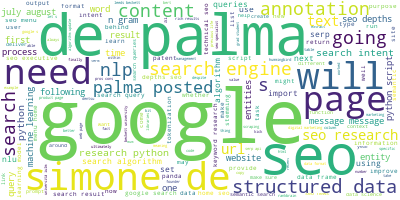

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(crawl['body_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

#Step 4: Prepare text for LDA analysis
Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [9]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = crawl.body_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['seo', 'research', 'python', 'scripts', 'seo', 'menu', 'home', 'seo', 'research', 'python', 'seo', 'search', 'seo', 'depths', 'google', 'pros', 'cons', 'rich', 'results', 'annotations', 'noticed', 'new', 'pros', 'cons', 'serp', 'feature', 'learn', 'annotations', 'improve', 'seo']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 3), (26, 1), (27, 1), (28, 1), (29, 1)]


#Step 5: LDA model tranining
To keep things simple, we'll keep all the parameters to default except for inputting the number of topics.

The number of topics is left at 10 by default, where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [11]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"seo" + 0.017*"search" + 0.016*"google" + 0.014*"message" + '
  '0.011*"python" + 0.008*"research" + 0.008*"de" + 0.007*"august" + '
  '0.007*"simone" + 0.007*"palma"'),
 (1,
  '0.037*"search" + 0.024*"seo" + 0.018*"google" + 0.011*"python" + '
  '0.008*"intent" + 0.008*"data" + 0.008*"july" + 0.007*"simone" + 0.007*"de" '
  '+ 0.007*"research"'),
 (2,
  '0.022*"search" + 0.019*"google" + 0.015*"seo" + 0.012*"python" + '
  '0.007*"page" + 0.006*"research" + 0.006*"palma" + 0.006*"nlp" + '
  '0.006*"need" + 0.006*"data"'),
 (3,
  '0.021*"search" + 0.015*"google" + 0.015*"seo" + 0.012*"data" + '
  '0.010*"python" + 0.007*"palma" + 0.007*"july" + 0.006*"entity" + '
  '0.005*"simone" + 0.005*"query"'),
 (4,
  '0.034*"seo" + 0.019*"search" + 0.018*"google" + 0.015*"python" + '
  '0.010*"data" + 0.008*"research" + 0.007*"palma" + 0.007*"message" + '
  '0.006*"de" + 0.006*"intent"'),
 (5,
  '0.016*"google" + 0.016*"search" + 0.009*"seo" + 0.007*"data" + '
  '0.007*"python" + 0.0

# Analyzing our LDA model


---


Now that we have a trained model let’s **visualize the topics for interpretability**. 

To do so, we’ll use a popular visualization package, **pyLDAvis** which is designed to help interactively with:

- Better understanding and interpreting individual topics
- Better understanding the relationships between the topics.

NOTES:

⚠️ If you're using Google Colab, `!pip install pyLDAvis.gensim`

⚠️ Please note that because the original `pyLDAvis.gensim` package has been dismissed, we need to import **pyLDAvis.gensim_models`**

In [19]:
!pip install pyLDAvis.gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


In [21]:
!pip install pyLDAvis


import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim_models

import matplotlib.pyplot as plt 
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content/iCloud Drive_Scrivania' +str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/content/iCloud Drive_Scrivania'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.018660 -0.008593       1        1  59.574115
4     -0.011228 -0.008280       2        1  17.880840
2     -0.009245  0.005837       3        1  11.065563
9      0.010073  0.003961       4        1   7.928932
0     -0.015012 -0.000728       5        1   2.884402
7      0.020568 -0.016594       6        1   0.591254
3     -0.003125  0.000457       7        1   0.018724
6      0.012028  0.000568       8        1   0.018723
8      0.016577  0.007111       9        1   0.018723
5     -0.001977  0.016261      10        1   0.018723, topic_info=         Term        Freq       Total Category  logprob  loglift
62     search  353.000000  353.000000  Default  30.0000  30.0000
63        seo  280.000000  280.000000  Default  29.0000  29.0000
25     google  206.000000  206.000000  Default  28.0000  28.0000
101      data  102.000000  102.000000  Default  27.0000  27.0000
52     python  132.000000  132.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
298    intent    0.007152   78.473338  Topic10  -5.7247  -0.7199
335       nlp    0.006419   59.011986  Topic10  -5.8329  -0.5431
138  previous    0.005487   39.779048  Topic10  -5.9897  -0.3056
362      post    0.005365   37.100666  Topic10  -6.0123  -0.2584
65       serp    0.005354   38.256194  Topic10  -6.0142  -0.2910

[831 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1919      1  0.497471  acronym
168       1  0.428605   adjust
168       2  0.428605   adjust
2433      1  0.788560  adopted
2434      1  0.797945   adults
...     ...       ...      ...
833       2  0.111143    years
833       3  0.055571    years
833       4  0.055571    years
852       1  0.578993    yield
852       2  0.192998    yield

[1007 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 10, 1, 8, 4, 7, 9, 6])

#Data Output Interpretation


---
1️⃣ In the first matrix, you get an overview of **topic relationships** on the targeted website.

In this example, we may desume that **data** tends to drift away from the main topic modeling clusters. This means you need to investigate whether pages embedding this topic are worth to be removed.


---

2️⃣ In the bar chart on your right you get the overall **term frequency** along with the **estimated term frequency within the selected topics**. This is important to understand which entities are deemed +/- relevant to Google across the targeted website.

By **cross-referencing the bar chart with the matrix**, we may desume that the estimated term frequency on the main Topic Cluster (n.1) deems **search** as the most relevant and **entities** and **algorithms** as the least relevant.
